In [1]:
import pandas as pd
import wandb
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import json
import numpy as np

In [2]:
method="procrustes" 
extend_exp=""
vm_name = {
    'resnet101': 'ResNet101',
    'resnet152': 'ResNet152',
    'resnet18': 'ResNet18',
    'resnet34': 'ResNet34',
    'resnet50': 'ResNet50',
    'segformer-b0-finetuned-ade-512-512': 'SegFormer-B0',
    'segformer-b1-finetuned-ade-512-512': 'SegFormer-B1',
    'segformer-b2-finetuned-ade-512-512': 'SegFormer-B2',
    'segformer-b3-finetuned-ade-512-512': 'SegFormer-B3',
    'segformer-b4-finetuned-ade-512-512': 'SegFormer-B4',
    'segformer-b5-finetuned-ade-640-640': 'SegFormer-B5',
    'vit-mae-base': 'MAE-Base',
    'vit-mae-huge': 'MAE-Huge',
    'vit-mae-large': 'MAE-Large'
}


In [3]:
api = wandb.Api()
df = pd.DataFrame()

model_name = {'bert_uncased_L-2_H-128_A-2': "BERT_TINY",
                'bert_uncased_L-4_H-256_A-4': "BERT_MINI" ,
                'bert_uncased_L-4_H-512_A-8': "BERT_SMALL",
                'bert_uncased_L-8_H-512_A-8': "BERT_MEDIUM",
                'bert-base-uncased': "BERT_BASE",
                'bert-large-uncased': "BERT_LARGE",
                'gpt2': "GPT2_BASE",
                'gpt2-medium': "GPT2_MEDIUM",
                'gpt2-large': "GPT2_LARGE",
                'gpt2-xl': "GPT2_XL",
                'opt-125m': "OPT_125M",
                'opt-1.3b': "OPT_1.3B",
                'opt-6.7b': "OPT_6.7B",
                'opt-30b': "OPT_30B",
                "fasttext":"fastText"}

model_size = {'bert_uncased_L-2_H-128_A-2':4.4, 'bert_uncased_L-4_H-256_A-4':11.3, 'bert_uncased_L-4_H-512_A-8':29.1, 
    'bert_uncased_L-8_H-512_A-8':41.7, 'bert-base-uncased':110, 'bert-large-uncased':340, 
    'gpt2':117,  'gpt2-large':762, 'gpt2-xl':1542, 'opt-125m':125, 'opt-6.7b':6700, 'opt-30b':30000}

model_tags = {
    "ft": "fasttext",
    "bert": "bert",
    "gpt2": "gpt2",
    "opt": "opt"
}


for model_alias in ["bert", "gpt2", "opt"]:
    method_name = "Procrustes Analysis" if method == "procrustes" else "Ridge Regression"
    runs = api.runs(path=f"jalee/image2{model_alias}_{method}-cleaned{extend_exp}")
    # metrics = runs.summary["Results"]

    # data = []
    for i, single_run in enumerate(runs):
        metric = json.load(single_run.file(single_run.summary["Results"]["path"]).download(exist_ok=True))
        df = pd.concat([df,pd.DataFrame(metric["data"], columns=metric["columns"])])

# # df['Subjects'] = df['Subjects'].replace({f'brain_{i}': f'Subject-{i}' for i in range(1, num_subs + 1)})
# df['Layers'] = df['Layers'].replace({f'layer_{i}': f'layer-{i})
df['Models_size'] = df['Models'].copy()
df['Models_size'] = df['Models_size'].replace(model_size)
df['VM'] = df['VM'].replace(vm_name)
df['Models'] = df['Models'].replace(model_name)
#
group_names = ["Models", "VM"]
if extend_exp != "":
    group_names.append("Bins")
#
precision_csls, precision_nn = [], []
for k in [1, 10, 100]:
    precision_csls.append(f'P@{k}-CSLS')
    precision_nn.append(f'P@{k}-NN')

precision = precision_csls
#
precision.append("Models_size")

In [4]:
seed_avg = df.groupby(group_names)[precision].mean().reset_index().sort_values(by='Models_size', ascending=True)
seed_avg

,Models,VM,P@1-CSLS,P@10-CSLS,P@100-CSLS,Models_size
83,BERT_TINY,SegFormer-B5,1.132000,6.160000,20.492000,4.4
71,BERT_TINY,MAE-Huge,1.162000,5.618000,19.654000,4.4
72,BERT_TINY,MAE-Large,0.988000,5.502000,19.002000,4.4
73,BERT_TINY,ResNet101,1.676000,7.238000,23.196000,4.4
74,BERT_TINY,ResNet152,1.596000,7.180000,22.978000,4.4
...,...,...,...,...,...,...
142,OPT_30B,MAE-Large,5.752500,24.487500,54.527000,30000.0
141,OPT_30B,MAE-Huge,6.433600,27.294000,57.633200,30000.0
140,OPT_30B,MAE-Base,4.011333,18.313333,46.688667,30000.0
152,OPT_30B,SegFormer-B4,5.525000,23.198000,54.562000,30000.0


In [5]:

# import matplotlib.pyplot as plt

# fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
# seed_avg_bert = seed_avg.loc[seed_avg["Models"].str.startswith("BERT")]
# boxplot1 = sns.boxplot(data=seed_avg_bert, x="Models", y="P@1-CSLS", ax=axs[0])
# boxplot2 = sns.boxplot(data=seed_avg_bert, x="Models", y="P@10-CSLS", ax=axs[1])
# boxplot3 = sns.boxplot(data=seed_avg_bert, x="Models", y="P@100-CSLS", ax=axs[2])
# # set x-axis label rotation for both box plots
# for ax in [boxplot1.axes, boxplot2.axes, boxplot3.axes]:
#     plt.setp(ax.get_xticklabels(), rotation=90)

# show the plots
# plt.show()

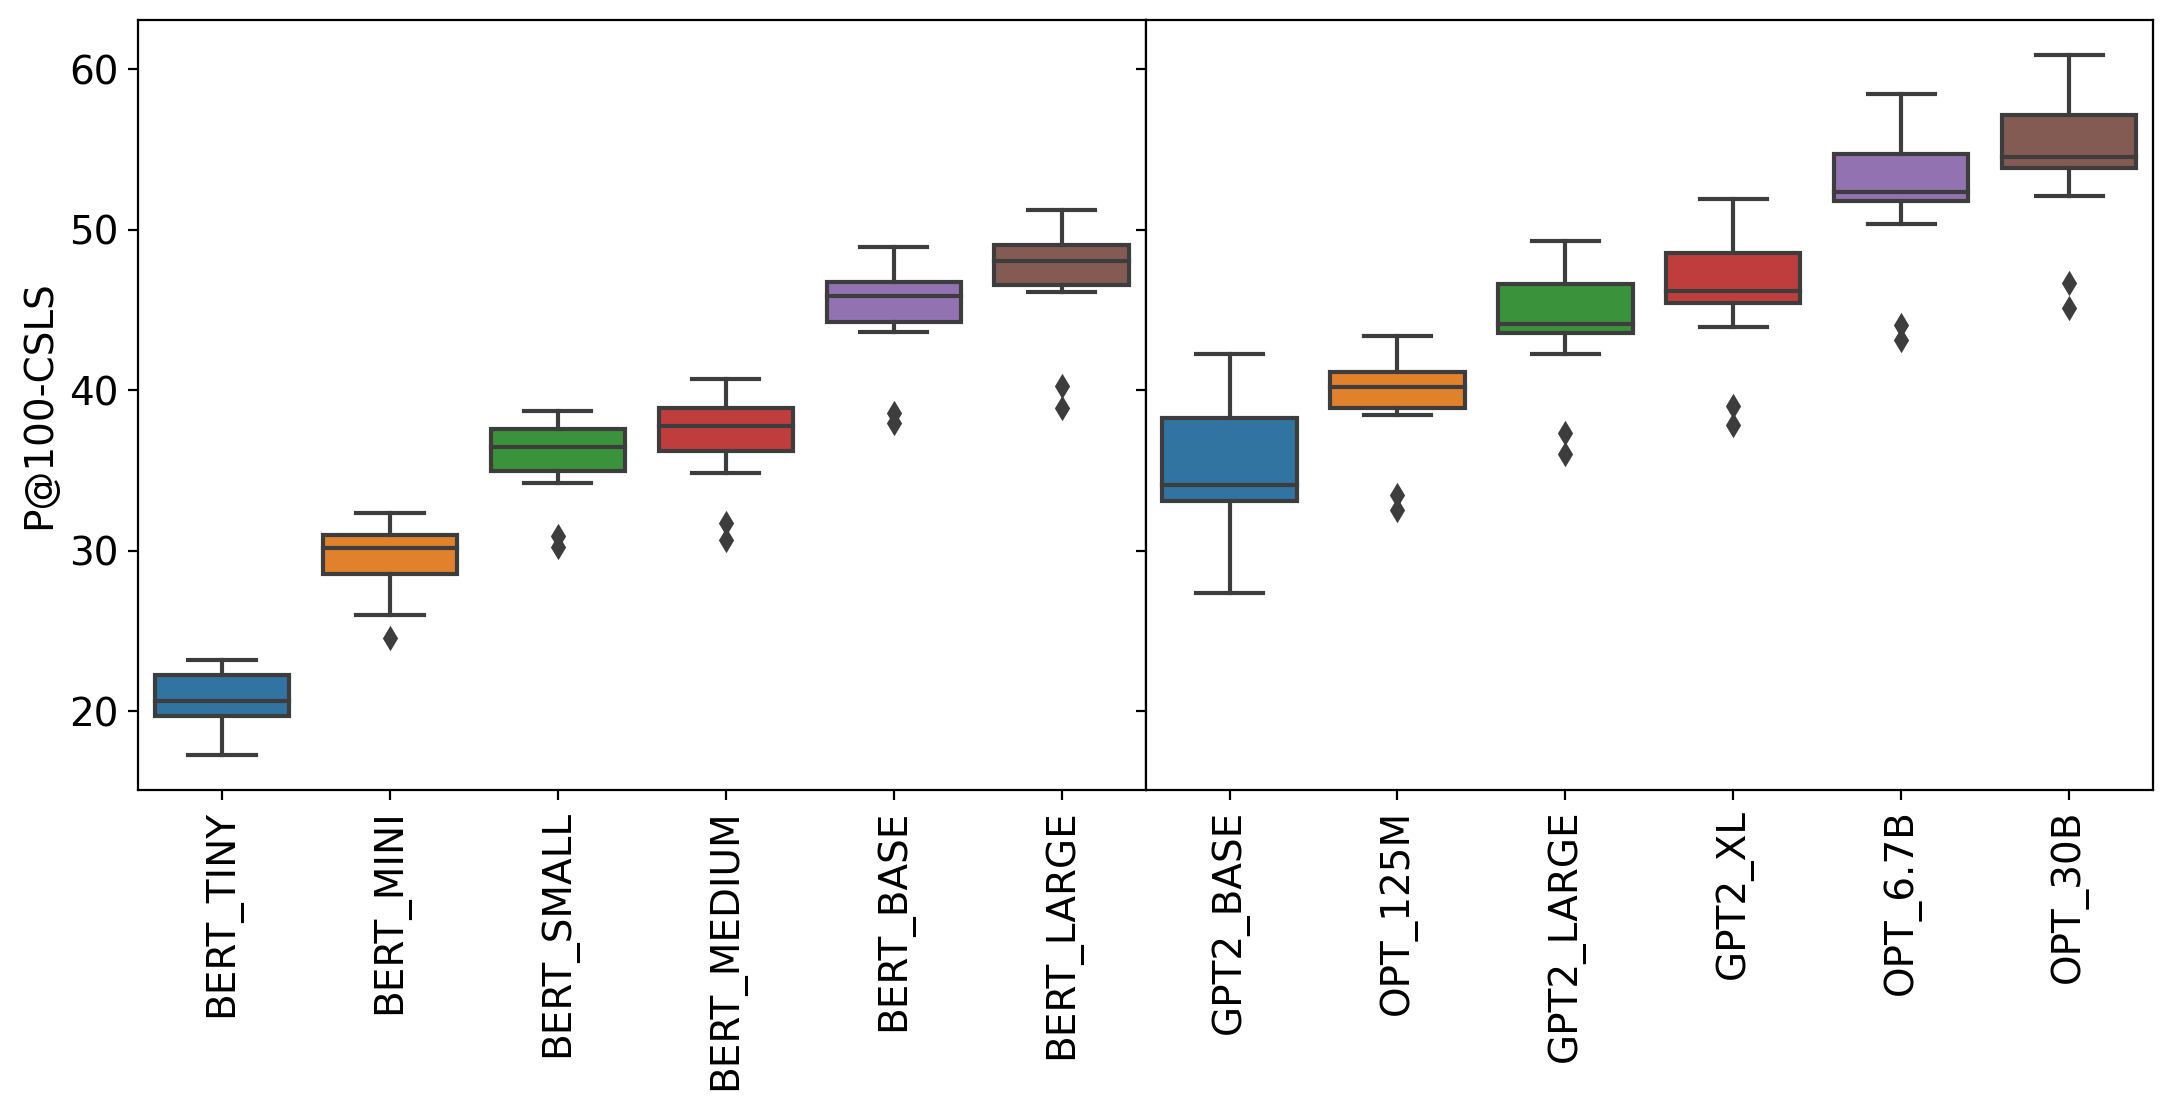

In [20]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, figsize=(13, 5), sharey=True, dpi=200,gridspec_kw = {'wspace':0, 'hspace':0.1})
seed_avg_gpt = seed_avg.loc[(seed_avg["Models"].str.startswith("GPT2")) | (seed_avg["Models"].str.startswith("OPT"))]
seed_avg_bert = seed_avg.loc[seed_avg["Models"].str.startswith("BERT")]
boxplot1 = sns.boxplot(data=seed_avg_bert, x="Models", y="P@100-CSLS", ax=axs[0])
boxplot2 = sns.boxplot(data=seed_avg_gpt, x="Models", y="P@100-CSLS", ax=axs[1])
# boxplot3 = sns.boxplot(data=seed_avg_bert, x="Models", y="P@10-CSLS", ax=axs[1][0])
# boxplot4 = sns.boxplot(data=seed_avg_gpt, x="Models", y="P@10-CSLS", ax=axs[1][1])
# boxplot5 = sns.boxplot(data=seed_avg_bert, x="Models", y="P@100-CSLS", ax=axs[2][0])
# boxplot6 = sns.boxplot(data=seed_avg_gpt, x="Models", y="P@100-CSLS", ax=axs[2][1])
# set x-axis label rotation for both box plots
for idx, ax in enumerate([boxplot1.axes, boxplot2.axes, boxplot3.axes, boxplot4.axes, boxplot5.axes, boxplot6.axes]):
    plt.setp(ax.get_xticklabels(), rotation=90)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    if idx == 0:
        ax.set_ylabel("P@100-CSLS", fontsize=14)
    else:
        ax.set_ylabel("")
    ax.set_xlabel("")

    


In [ ]:
vm_selected = seed_avg.loc[(seed_avg["VM"] == "ResNet18") | (seed_avg["VM"] == "ResNet50") | (seed_avg["VM"] == "ResNet152") | (seed_avg["VM"] == "SegFormer-B0") | (seed_avg["VM"] == "SegFormer-B3") | (seed_avg["VM"] == "SegFormer-B5") | (seed_avg["VM"] == "MAE-Base") | (seed_avg["VM"] == "MAE-Large") | (seed_avg["VM"] == "MAE-Huge")]
# seed_avg["VM"][:14]
vm_list = ["SegFormer-B0", "SegFormer-B3" , "SegFormer-B5", "MAE-Base" , "MAE-Large", "MAE-Huge", "ResNet18", "ResNet50" , "ResNet152"]
vm_left = ["SegFormer-B1", "SegFormer-B2" , "SegFormer-B4","ResNet34", "ResNet101"]
vm_selected_left = seed_avg.loc[(seed_avg["VM"] == "ResNet34") | (seed_avg["VM"] == "ResNet101") | (seed_avg["VM"] == "SegFormer-B1") | (seed_avg["VM"] == "SegFormer-B2") | (seed_avg["VM"] == "SegFormer-B4")]


In [ ]:
vm_test = vm_selected.loc[(vm_selected["VM"] == "ResNet18") & (vm_selected["Models"].str.startswith("OPT"))].sort_values(by='Models_size', ascending=True)
vm_test

In [ ]:
vm_selected_left.loc[(vm_selected_left["VM"] == "SegFormer-B1")]

In [ ]:
vm_selected_left.loc[(vm_selected_left["VM"] == "SegFormer-B4")]

In [ ]:
rows, cols = 3,3
fig, axes = plt.subplots(nrows=rows, ncols=cols, sharey=True, dpi=200, figsize =(13, 8), gridspec_kw = {'wspace':0, 'hspace':0.4})
colors = sns.color_palette("hls", 3)
lines = []
for i, ax in enumerate(axes.flatten()):
    ax.set_prop_cycle('color', colors)
    if i % 3 == 0 :
        ax.set_ylabel('Precision@K',fontsize=14)
    if 5 < i: 
        ax.set_xlabel('Millions of parameters (log)',fontsize=14)
    
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    vm_specific = vm_list[i]
    vm_bert = vm_selected.loc[(vm_selected["VM"] == vm_specific) & (vm_selected["Models"].str.startswith("BERT"))].sort_values(by='Models_size', ascending=True)
    vm_gpt2 = vm_selected.loc[(vm_selected["VM"] == vm_specific) & (vm_selected["Models"].str.startswith("GPT2"))].sort_values(by='Models_size', ascending=True)
    vm_opt = vm_selected.loc[(vm_selected["VM"] == vm_specific) & (vm_selected["Models"].str.startswith("OPT"))].sort_values(by='Models_size', ascending=True)

    precision_bert = np.array([vm_bert["P@1-CSLS"], vm_bert["P@10-CSLS"], vm_bert["P@100-CSLS"]]).T
    precision_gpt2 = np.array([vm_gpt2["P@1-CSLS"], vm_gpt2["P@10-CSLS"], vm_gpt2["P@100-CSLS"]]).T
    precision_opt = np.array([vm_opt["P@1-CSLS"], vm_opt["P@10-CSLS"], vm_opt["P@100-CSLS"]]).T
    for idx, k in enumerate([1, 10, 100]):
        if k == 1:
            line_style = '-'
        elif k == 10:
            line_style = '--'
        else:
            line_style = ':'
        line1, = ax.plot(vm_bert["Models_size"], precision_bert[:,idx], marker='*', linestyle=line_style)
        line2, = ax.plot(vm_gpt2["Models_size"], precision_gpt2[:,idx], marker='^', linestyle=line_style)
        line3, = ax.plot(vm_opt["Models_size"], precision_opt[:,idx], marker='o', linestyle=line_style)
        lines.append((line1, line2, line3))
    ax.set_xscale('log')
    ax.set_ylim(0,65)
    ax.set_title(vm_specific, fontsize=14)
    
lines_test = [lines[0][0], lines[1][1], lines[2][2]]

labels1 = [f"Solid: K = 1", f"Dashed: K = 10", f"Dotted: K = 100"]
labels2 = ["BERT", "GPT2", "OPT"]
labels = labels2 + labels1
handles1 = [Line2D([], [], color="black", linestyle=line.get_linestyle()) for line in lines_test]
handles2 = [plt.scatter([], [], marker=line.get_marker()) for line in lines_test]
handles = handles2 + handles1

fig.legend(handles, labels, bbox_to_anchor=(0., 0.03, 1., -.102), loc='center',
                    ncol=6, borderaxespad=0., fontsize=14)
# plt.savefig(f'res34&50&101&segb0-4_vs_LMs.pdf', bbox_inches='tight')
# plt.savefig(f'MAEs_vs_LMs.pdf', bbox_inches='tight')
# left_vm_vs_LMs.pdf
# plt.savefig(f'Res&Segs&MAEs_vs_LMs_cleaned.pdf', bbox_inches='tight')

In [ ]:
import matplotlib.gridspec as gridspec
# rows, cols = 2,3
gs = gridspec.GridSpec(2, 6)
fig = plt.figure(figsize =(13, 6))
gs.update(hspace=0.55, wspace=0)
colors = sns.color_palette("hls", 3)

lines = []

for ids, vm in enumerate(vm_left):  
    # print(ids//3)
    if ids < 3:
        ax = plt.subplot(gs[0, ids*2:(ids*2)+2])
    else:
        if ids == 3:
            ax = plt.subplot(gs[1, 1:3])
        else:
            ax = plt.subplot(gs[1, 3:5])
    ax.set_prop_cycle('color', colors)
    if ids % 3 == 0 :
        ax.set_ylabel('Precision@K',fontsize=14)
    else:
        ax.set_yticklabels([])

    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    vm_specific = vm_left[ids]
    # print(vm_specific)
    vm_bert = vm_selected_left.loc[(vm_selected_left["VM"] == vm_specific) & (vm_selected_left["Models"].str.startswith("BERT"))].sort_values(by='Models_size', ascending=True)
    vm_gpt2 = vm_selected_left.loc[(vm_selected_left["VM"] == vm_specific) & (vm_selected_left["Models"].str.startswith("GPT2"))].sort_values(by='Models_size', ascending=True)
    vm_opt = vm_selected_left.loc[(vm_selected_left["VM"] == vm_specific) & (vm_selected_left["Models"].str.startswith("OPT"))].sort_values(by='Models_size', ascending=True)

    precision_bert = np.array([vm_bert["P@1-CSLS"], vm_bert["P@10-CSLS"], vm_bert["P@100-CSLS"]]).T
    precision_gpt2 = np.array([vm_gpt2["P@1-CSLS"], vm_gpt2["P@10-CSLS"], vm_gpt2["P@100-CSLS"]]).T
    precision_opt = np.array([vm_opt["P@1-CSLS"], vm_opt["P@10-CSLS"], vm_opt["P@100-CSLS"]]).T
    for idx, k in enumerate([1, 10, 100]):
        if k == 1:
            line_style = '-'
        elif k == 10:
            line_style = '--'
        else:
            line_style = ':'
        line1, = ax.plot(vm_bert["Models_size"], precision_bert[:,idx], marker='*', linestyle=line_style)
        line2, = ax.plot(vm_gpt2["Models_size"], precision_gpt2[:,idx], marker='^', linestyle=line_style)
        line3, = ax.plot(vm_opt["Models_size"], precision_opt[:,idx], marker='o', linestyle=line_style)
        lines.append((line1, line2, line3))
    ax.set_xscale('log')
    ax.set_ylim(0,65)
    ax.set_title(vm_specific, fontsize=14)
    
lines_test = [lines[0][0], lines[1][1], lines[2][2]]

labels1 = [f"Solid: K = 1", f"Dashed: K = 10", f"Dotted: K = 100"]
labels2 = ["BERT", "GPT2", "OPT"]
labels = labels2 + labels1
handles1 = [Line2D([], [], color="black", linestyle=line.get_linestyle()) for line in lines_test]
handles2 = [plt.scatter([], [], marker=line.get_marker()) for line in lines_test]
handles = handles2 + handles1


fig.legend(handles, labels, bbox_to_anchor=(0., 0.03, 1., -.102), loc='center',
                    ncol=6, borderaxespad=0., fontsize=14)

# plt.savefig(f'left_vm_vs_LMs_cleaned.pdf', bbox_inches='tight')